In [12]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Generate data
X, y = make_blobs(n_samples=10, centers=3, n_features=2, cluster_std=1, random_state=2)

In [21]:
k_means = KMeans(n_clusters=3)
fit_output = k_means.fit(X)
fit_output

array([[ 0.91726852, -1.09759656],
       [-1.91276376, -3.85376933],
       [-1.2706213 , -9.72647865]])

In [ ]:
class KMeans:

    def __init__(self, n_clusters=3, max_iter=100, seed=0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.seed = seed

    def fit_predict(self, X):
        
        ### Subsetting random nc data points as initial centroids
        np.random.seed(self.seed)
        random_idx = np.random.choice(X.shape[0], size=self.n_clusters, replace=False)
        centroids = X[random_idx]

        ### Loop parameters
        converged = False
        i = 1

        ### Loop until convergence
        while not converged:
            
            ### Distance matrix
            dist_np = self._distance_matrix(X, centroids)

            ### Assigning clusters labels to samples
            y_pred = np.argmin(dist_np, axis=0)

            ### Calculate new centroids
            new_centroids = np.array([X[np.where(y_pred == k)].mean(axis=0) for k in range(self.n_clusters)])

            ### Check if the centroids have changed
            if np.all(centroids == new_centroids):
                ### Stop if the centroids have not changed
                converged = True
                
                ### Update the class centroids
                self.centroids = centroids

                ### Return the centroids and the data labels
                return y_pred
            
            ### Stop after max_iter iterations
            elif i >= max_iter:
                print(f'Stopped after {i} iterations')
                converged = True
            
            ### Set up for next iteration
            else:
                centroids = new_centroids
                i += 1

        
    def _distance_matrix(self, X_train, X_test):
        """
        Calculate a Euclidean distance matrix between two data sets.

        Parameters:
            X_train (np.array): 2D NumPy array with shape (n_train, n_features)
            X_test (np.array): 2D NumPy array with shape (n_test, n_features)

        Returns:
            distances (np.array):  2D NumPy array with shape (n_test, n_train)
        """
        return np.sqrt(((X_test[:, np.newaxis, :] - X_train[np.newaxis, :, :]) ** 2).sum(axis=2))

In [ ]:
### Recycled form 7.1
def euclidean_distance(X_train, X_test):
    '''
    Calculate the Euclidean distance between two points 
    
    Parameter:
        - Two data points as 1D NumPy arrays of the same dimension (same number of features)
    
    Returns:
        - Euclidean distance between the two points
    '''
    return np.sqrt(np.sum((X_train - X_test) ** 2))

### Recycled form 7.1 - adapted
def euclidean_distances(X_cent, X):
    '''
    Calculate all Euclidean distances between two data sets (X_cent and X). 
    
    Prameters:
        X_cent: 2D NumPy array with the centroids.
        X: 2D NumPy array with the data points.
    Returns:
        DataFrame with the distances and the indices of X_cent and X.
    '''
    ### Creating DataFrames with indices
    cent_idx_df = pd.DataFrame({'cent_idx': np.arange(X_cent.shape[0])})
    X_idx_df = pd.DataFrame({'X_idx': np.arange(X.shape[0])})
    
    ### Cross-merge to get all combinations of of centroid and data points
    euc_dist_df = cent_idx_df.merge(X_idx_df, how='cross')

    ### Calculating Euclidean distances
    euc_dist_df['distance'] = euc_dist_df.apply(lambda x: euclidean_distance(X_cent[x['cent_idx']], X[x['X_idx']]), axis=1)   
    
    return euc_dist_df


def KM(X, nc=3, seed=0, max_iter=100):
    '''
    Cluster data points based on Eucledean distance.

    Parameters:
        X: 2D NumPy array with the data points.
        nc: Number of clusters.
        seed: Integer to use as random seed.
        max_iter: Maximum number of iterations for convergence.
    
    Returns:
        new_centroids: 2D NumPy array with the final centroids.
        y_pred: 1D NumPy array with the cluster labels of the data points.
    '''
        
    ### Subsetting random nc data points as initial centroids
    np.random.seed(seed)
    random_idx = np.random.choice(X.shape[0], size=nc, replace=False)
    centroids = X[random_idx]

    ### Loop parameters
    converged = False
    i = 1

    ### Loop until convergence
    while not converged:
        ### Distance matrix
        tall_dist_df = euclidean_distances(centroids, X)

        ### Assign each data point to the closest centroid by sorting the distance matrix and dropping duplicates
        tall_cent_df = tall_dist_df.sort_values(by='distance').drop_duplicates(subset='X_idx', keep='first')

        ### Series with data point idx assigned to each cluster idx
        grouped_df = tall_cent_df.groupby('cent_idx')['X_idx'].apply(list)

        ### Calculate the mean of each cluster
        new_centroids = np.array([X[indices].mean(axis=0) for indices in grouped_df])


        ### Check if the centroids have changed
        if np.all(centroids == new_centroids):
            #print(f'Converged in {i} iterations')
            converged = True
            
            ### Prepare cluster labels of X for output
            y_pred = np.array(tall_cent_df.sort_values(by='X_idx')['cent_idx'])

            ### Return the centroids and the data labels
            return new_centroids, y_pred
        
        ### Stop after max_iter iterations
        elif i >= max_iter:
            print(f'Stopped after {i} iterations')
            converged = True
        
        ### Set up for next iteration
        else:
            centroids = new_centroids
            i += 1


## Problem 7.2 (Meeting K-Means)

This problem aims at getting first insights into K-Means.

### a) Using `make_blobs` from `sklearn.datasets` first generate data, e.g., by
```
X, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=1, random_state=2)
```
Fit K-Means with K=4 clusters to the data using `KMeans` from `sklearn.cluster`. Plot the data with the predicted labels together with the four cluster centers (e.g., using `cluster_centers_`). What if we consider K = 2 or K = 4 clusters instead?

### b) Consider K-Means with K=2 clusters for the data
```
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
```
with `make_moons` from `sklearn.datasets`. What do you observe?

### c) Optional: Write and test your own function `KM` which takes as input data `X` and number of clusters `nc`, and returns the predicted labels and the cluster centers based on K-Means.


## Task a)

Exception in thread Thread-3 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\wadh5096\AppData\Local\anaconda3\envs\kfu\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "C:\Users\wadh5096\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\wadh5096\AppData\Local\anaconda3\envs\kfu\Lib\threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\wadh5096\AppData\Local\anaconda3\envs\kfu\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x81 in position 3: invalid start byte
c:\Users\wadh5096\AppData\Local\anaconda3\envs\kfu\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:


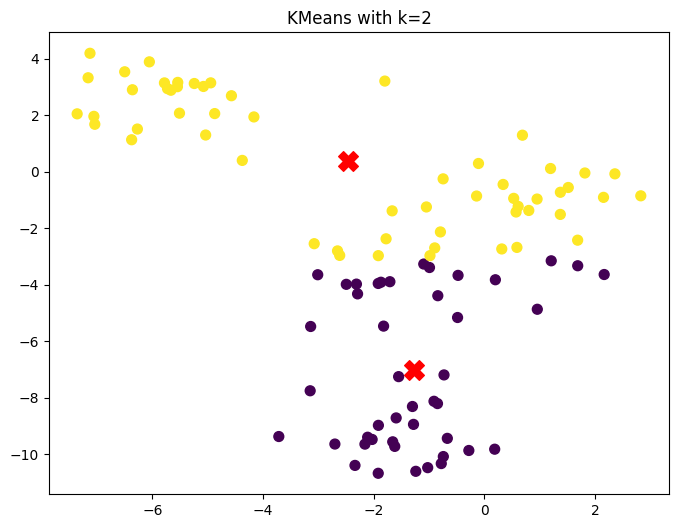

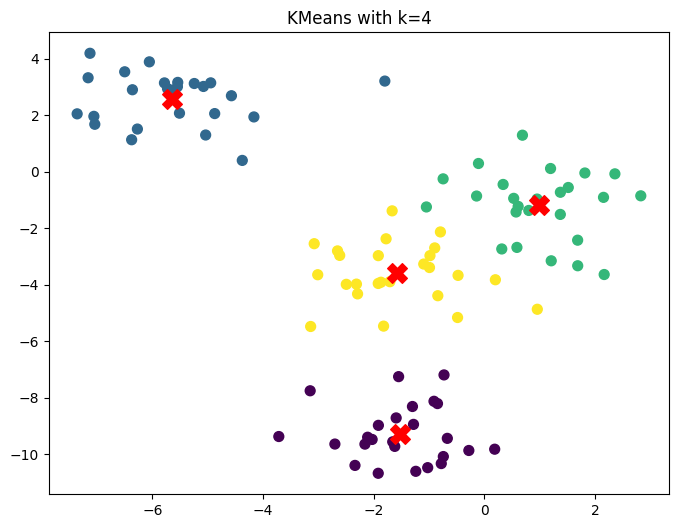

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Generate data
X, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=1, random_state=2)

### Looping over different values of k
for k in [2, 4]:
    
    ### Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)

    ### Predict clusters
    y_pred = kmeans.predict(X)

    ### Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
    plt.title(f'KMeans with k={k}')
    plt.show()




Task b)

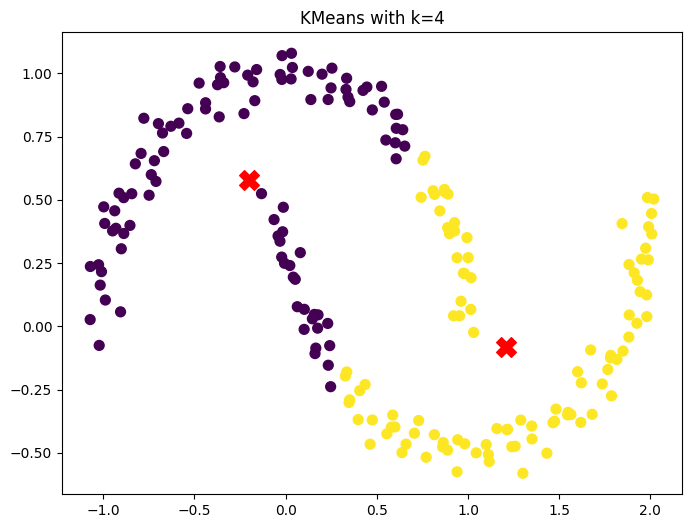

In [2]:
from sklearn.datasets import make_moons

### Generate data
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)


### Fit KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

### Predict clusters
y_pred = kmeans.predict(X)

### Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title(f'KMeans with k={k}')
plt.show()

Task c)

In [3]:
### Recycled form 7.1
def euclidean_distance(X_train, X_test):
    '''
    Calculate the Euclidean distance between two points 
    
    Parameter:
        - Two data points as 1D NumPy arrays of the same dimension (same number of features)
    
    Returns:
        - Euclidean distance between the two points
    '''
    return np.sqrt(np.sum((X_train - X_test) ** 2))

### Recycled form 7.1 - adapted
def euclidean_distances(X_cent, X):
    '''
    Calculate all Euclidean distances between two data sets (X_cent and X). 
    
    Prameters:
        X_cent: 2D NumPy array with the centroids.
        X: 2D NumPy array with the data points.
    Returns:
        DataFrame with the distances and the indices of X_cent and X.
    '''
    ### Creating DataFrames with indices
    cent_idx_df = pd.DataFrame({'cent_idx': np.arange(X_cent.shape[0])})
    X_idx_df = pd.DataFrame({'X_idx': np.arange(X.shape[0])})
    
    ### Cross-merge to get all combinations of of centroid and data points
    euc_dist_df = cent_idx_df.merge(X_idx_df, how='cross')

    ### Calculating Euclidean distances
    euc_dist_df['distance'] = euc_dist_df.apply(lambda x: euclidean_distance(X_cent[x['cent_idx']], X[x['X_idx']]), axis=1)   
    
    return euc_dist_df


def KM(X, nc=3, seed=0, max_iter=100):
    '''
    Cluster data points based on Eucledean distance.

    Parameters:
        X: 2D NumPy array with the data points.
        nc: Number of clusters.
        seed: Integer to use as random seed.
        max_iter: Maximum number of iterations for convergence.
    
    Returns:
        new_centroids: 2D NumPy array with the final centroids.
        y_pred: 1D NumPy array with the cluster labels of the data points.
    '''
        
    ### Subsetting random nc data points as initial centroids
    np.random.seed(seed)
    random_idx = np.random.choice(X.shape[0], size=nc, replace=False)
    centroids = X[random_idx]

    ### Loop parameters
    converged = False
    i = 1

    ### Loop until convergence
    while not converged:
        ### Distance matrix
        tall_dist_df = euclidean_distances(centroids, X)

        ### Assign each data point to the closest centroid by sorting the distance matrix and dropping duplicates
        tall_cent_df = tall_dist_df.sort_values(by='distance').drop_duplicates(subset='X_idx', keep='first')

        ### Series with data point idx assigned to each cluster idx
        grouped_df = tall_cent_df.groupby('cent_idx')['X_idx'].apply(list)

        ### Calculate the mean of each cluster
        new_centroids = np.array([X[indices].mean(axis=0) for indices in grouped_df])


        ### Check if the centroids have changed
        if np.all(centroids == new_centroids):
            #print(f'Converged in {i} iterations')
            converged = True
            
            ### Prepare cluster labels of X for output
            y_pred = np.array(tall_cent_df.sort_values(by='X_idx')['cent_idx'])

            ### Return the centroids and the data labels
            return new_centroids, y_pred
        
        ### Stop after max_iter iterations
        elif i >= max_iter:
            print(f'Stopped after {i} iterations')
            converged = True
        
        ### Set up for next iteration
        else:
            centroids = new_centroids
            i += 1

In [4]:
### Test clustering:
  # Data generation:         BLOBS 
  # matching the centroids:  TRUE

for k in range(2, 14):
    
    ### Generate data
    X, y = make_blobs(n_samples=100, centers=k, n_features=2, cluster_std=1, random_state=2)

    ## Custom function 
    oh_centroids, oh_y_pred = KM(X, nc=3, seed=0, max_iter=100)

    ### Clustering with sklearn
    kmeans = KMeans(n_clusters=3, random_state=0)
    kmeans.fit(X)
    sk_y_pred = kmeans.labels_
    sk_centroids = kmeans.cluster_centers_

    ### Check if the centroids are the same
    compare_labels_df = pd.DataFrame({'sklearn': sk_y_pred, 'custom': oh_y_pred})
    print(f'k = {k}:') 
    print(f'        max labels: {compare_labels_df.groupby('sklearn')['custom'].nunique().max()}')

    ### Eucledian distance between centroids
    euclidean_distance_df = euclidean_distances(sk_centroids, oh_centroids)

    ### Calculate the average distance between all centroids for reference
    avg_euclidean_distance = euclidean_distance_df['distance'].mean()

    ### Calculate the MinMax distance between all oh-centroids and the sk-centroids
    max_euclidean_distance = euclidean_distance_df.groupby('cent_idx')['distance'].min().max()

    ### Print Euclidean distances between centroids
    print(f'        MinMax dist: {np.format_float_scientific(max_euclidean_distance, precision=2)}')

### Explaining metrics
print('----------')
print('max labels is the maximum number of clusters derived from the custom function found in each sklearn cluster (should be 1)')
print('MinMax dist is maximum value of the minimum distance between the centroids of the custom function and the sklearn function')
print(f'For reference, the average Euclidean distance between all centroids (custom and sklearn) for k = {k} is {np.format_float_scientific(avg_euclidean_distance, precision=2)}')

k = 2:
        max labels: 2
        MinMax dist: 1.75e+00
k = 3:
        max labels: 1
        MinMax dist: 3.56e-15
k = 4:
        max labels: 1
        MinMax dist: 1.78e-15
k = 5:
        max labels: 2
        MinMax dist: 1.26e+00
k = 6:
        max labels: 2
        MinMax dist: 3.07e+00
k = 7:
        max labels: 1
        MinMax dist: 9.93e-16
k = 8:
        max labels: 1
        MinMax dist: 9.93e-16
k = 9:
        max labels: 1
        MinMax dist: 9.93e-16
k = 10:
        max labels: 1
        MinMax dist: 3.66e-15
k = 11:
        max labels: 2
        MinMax dist: 1.78e-01
k = 12:
        max labels: 1
        MinMax dist: 1.99e-15
k = 13:
        max labels: 1
        MinMax dist: 2.84e-15
----------
max labels is the maximum number of clusters derived from the custom function found in each sklearn cluster (should be 1)
MinMax dist is maximum value of the minimum distance between the centroids of the custom function and the sklearn function
For reference, the average Eucli

In [5]:
### Test clustering:
  # Data generation:         MOONS 
  # matching the centroids:  FALSE

for k in range(2, 14):
    
    ### Generate data
    X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

    ## Custom function 
    oh_centroids, oh_y_pred = KM(X, nc=3, seed=0, max_iter=100)

    ### Clustering with sklearn
    kmeans = KMeans(n_clusters=3, random_state=0)
    kmeans.fit(X)
    sk_y_pred = kmeans.labels_
    sk_centroids = kmeans.cluster_centers_

    ### Check if the centroids are the same
    compare_labels_df = pd.DataFrame({'sklearn': sk_y_pred, 'custom': oh_y_pred})
    print(f'k = {k}:') 
    print(f'        max labels: {compare_labels_df.groupby('sklearn')['custom'].nunique().max()}')

    ### Eucledian distance between centroids
    euclidean_distance_df = euclidean_distances(sk_centroids, oh_centroids)

    ### Calculate the average distance between all centroids for reference
    avg_euclidean_distance = euclidean_distance_df['distance'].mean()

    ### Calculate the MinMax distance between all oh-centroids and the sk-centroids
    max_euclidean_distance = euclidean_distance_df.groupby('cent_idx')['distance'].min().max()

    ### Print Euclidean distances between centroids
    print(f'        MinMax dist: {np.format_float_scientific(max_euclidean_distance, precision=2)}')

### Explaining metrics
print('----------')
print('max labels is the maximum number of clusters derived from the custom function found in each sklearn cluster (should be 1)')
print('MinMax dist is maximum value of the minimum distance between the centroids of the custom function and the sklearn function')
print(f'For reference, the average Euclidean distance between all centroids (custom and sklearn) for k = {k} is {np.format_float_scientific(avg_euclidean_distance, precision=2)}')

k = 2:
        max labels: 2
        MinMax dist: 4.06e-01
k = 3:
        max labels: 2
        MinMax dist: 4.06e-01
k = 4:
        max labels: 2
        MinMax dist: 4.06e-01
k = 5:
        max labels: 2
        MinMax dist: 4.06e-01
k = 6:
        max labels: 2
        MinMax dist: 4.06e-01
k = 7:
        max labels: 2
        MinMax dist: 4.06e-01
k = 8:
        max labels: 2
        MinMax dist: 4.06e-01
k = 9:
        max labels: 2
        MinMax dist: 4.06e-01
k = 10:
        max labels: 2
        MinMax dist: 4.06e-01
k = 11:
        max labels: 2
        MinMax dist: 4.06e-01
k = 12:
        max labels: 2
        MinMax dist: 4.06e-01
k = 13:
        max labels: 2
        MinMax dist: 4.06e-01
----------
max labels is the maximum number of clusters derived from the custom function found in each sklearn cluster (should be 1)
MinMax dist is maximum value of the minimum distance between the centroids of the custom function and the sklearn function
For reference, the average Eucli

In [6]:
max_euclidean_distance

np.float64(0.40599795162917796)

In [7]:
euclidean_distance_df

,cent_idx,X_idx,distance
0,0,0,0.803080
1,0,1,1.966140
2,0,2,0.269055
3,1,0,1.413684
4,1,1,0.279071
5,1,2,2.442765
6,2,0,0.405998
7,2,1,0.814727
8,2,2,1.373778


Explaination for test method labels:

In [8]:
### Generate data
X, y = make_blobs(n_samples=100, centers=4, n_features=2, cluster_std=1, random_state=2)
#X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

## Custom function 
oh_centroids, oh_y_pred = KM(X, nc=3, seed=0, max_iter=100)

### Clustering with sklearn
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
sk_y_pred = kmeans.labels_
sk_centroids = kmeans.cluster_centers_

### Cluster label value is not deterministic
compare_labels_df = pd.DataFrame({'sklearn': sk_y_pred, 'custom': oh_y_pred})
compare_labels_df

,sklearn,custom
0,1,2
1,1,2
2,2,0
3,2,0
4,1,2
...,...,...
95,1,2
96,1,2
97,0,1
98,1,2


In [9]:
### Group by cluster label and count unique labels for the other method
compare_labels_df.groupby('sklearn')['custom'].nunique()

sklearn
0    1
1    1
2    1
Name: custom, dtype: int64

In [10]:
### Same as above, but return the maximum number of unique labels (this value should be 1)
compare_labels_df.groupby('sklearn')['custom'].nunique().max()

np.int64(1)